In [60]:
import os
import time
import pandas as pd # to work on data frames and can handle any outlier or noise records in datasets
import numpy as np # to get algebratic opertaion on data
import matplotlib.pyplot as plt # to visualize data and cleaning ( i do it to show outputs of my cleaning (my point of veiw)) 
import seaborn as sns

import re # this library work on regular expressions for pattern matching and string manipulation i search alot on it i understand this only
import string # this library has ASCII letters, digits, punctuation, and whitespace i use it to get (punctuation) to remove it from data
import nltk # library we use to preprocess on text data to make it clean and in standerd form to use it in NLP
from nltk.corpus import stopwords # this module we use to remove stopwords
from nltk.tokenize import word_tokenize # this module we use it to tokanise text into words
from nltk.stem import WordNetLemmatizer # this lemmatizedr get base of each word to make words in his base ( if verb , noun , adverb or adgectives)

from sklearn.utils import resample # this module i use to oversample my data to get representitive data to represent toxic and nun-toxic equally
from sklearn.model_selection import train_test_split # to split dataset into training and testing and validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # to calculate accuracy and all of f1 score and other matrices

import tensorflow as tf # Importing the TensorFlow library this framwork to implement all of things about neural networks and DNN
from tensorflow.keras.preprocessing.text import Tokenizer # Importing the Tokenizer to tokanize my text using tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences # Importing the pad_sequences function from TensorFlow to pad my sequence and make all of sentence in same length

import torch # importing pytorch library this framework to run my neural networks
from torch import nn
import torch.optim as optim

from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW # importing pre-trained model BERT from transformers library

In [58]:
import tensorflow as tf

# Check if TensorFlow can access the GPU
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available: 1


In [59]:
import torch
print("Is GPU available in PyTorch:", torch.cuda.is_available())


Is GPU available in PyTorch: True


In [4]:
# we read our csv file using pd.read_csv
data = pd.read_csv(r"D:\FCDS\semster 7\NLP\Project\train.csv")

## **Check on all attributes are has outliers , null-values or duplicates**

To display our data and know about data and what is contain from features or labels and what is range of values of each column and what it's data type

In [5]:
# to show our records and columns and what this data contain.
data.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


**id** is an unique identifier for each comment , **comment_text** are comments (string) and all columns after that are adjectives for each column like "Hey man, I'm really not trying to edit war" is not **(toxic,severe_toxic,obscene,threat,insult or identity_hate)** we know if comment is **toxic** or not we look to record if **0** so is not toxic is **1** so is toxic comment and so on in preveious columns

we use it to know number of null values and datatype of each column and size of each column 

In [6]:
# to know number of records , null values in dataset and datatype of each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


we found "id" and "comment_text" are string data type and all columns after these are integers / we expect that from reading the data 

# check outliers

To know if our data is balanced or not and if we have outliers or not to make our model training well and can classify correctly beacuse outliers and imbalanced features make model not fitted on data and make data has large scale out of normal scale = (outlier) 

In [7]:
#to describe statstical informations about all numeric attributes
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


we found all numeric attributes are binary attribute have only 0 or 1 so **we don't have any outliers** in these columns but we found **imbalanced columns** and the majority of this is 0 these columns are ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', and 'identity_hate') so i will do more visualization and analysis to get way to solve this problem

# check null-values

To check if we have any null-values or not this make our model not train well so we will remove any null if number of nulls is small with respect to all number of records or we will found another way to fill it if the column that has null is important for training our model

In [8]:
#to know number of null values for all records in each column from our dataset
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

we don't have any null-values in our dataset so this indicate our model will be more accurate than if we found nulls 

# Check Duplicates

we will check duplicates to make our data is cleaned because duplicate make model may have overfitting and we will save records not understand it so we must remove records in comment text because it is only column may have duplicates because it is a text column

In [9]:
# we define function to check if we have duplicates or not
def check_duplicates(dataframe):
    # we define varibable to save in it index of duplicate if we find it
    duplicate_indices = []

    # Create a set to store unique comments from column comment_text
    unique_texts = set()

    # Iterate through the data row by row
    for index, row in dataframe.iterrows():
        # we will iterate on comment_text column this column we want to check duplicates in it
        comment_text = row['comment_text']

        # Check if the comment_text has been seen before or not
        if comment_text in unique_texts:
            # if comment_text is in unique_text
            # will append index of this in duplicate
            # this check find if text repeated or not   
            duplicate_indices.append(index)
        else:
            # we will save comment_text in unique_text 
            unique_texts.add(comment_text)
    # we will return indices of duplicates in list 
    # and if we found indices in it we will remove these indices
    return duplicate_indices

# we will Call the function to get indices of duplicate rows
duplicate_indices = check_duplicates(data)

# now we will Print the duplicate indices
print(duplicate_indices)

[]


i don't found any duplicates in comment text column so our data is cleaned and not make any bad effect on our model

# Solve imbalanced columns

i want to show Percentage of toxicity comments in my dataset to detect what is major and manior of imbalanced columns  

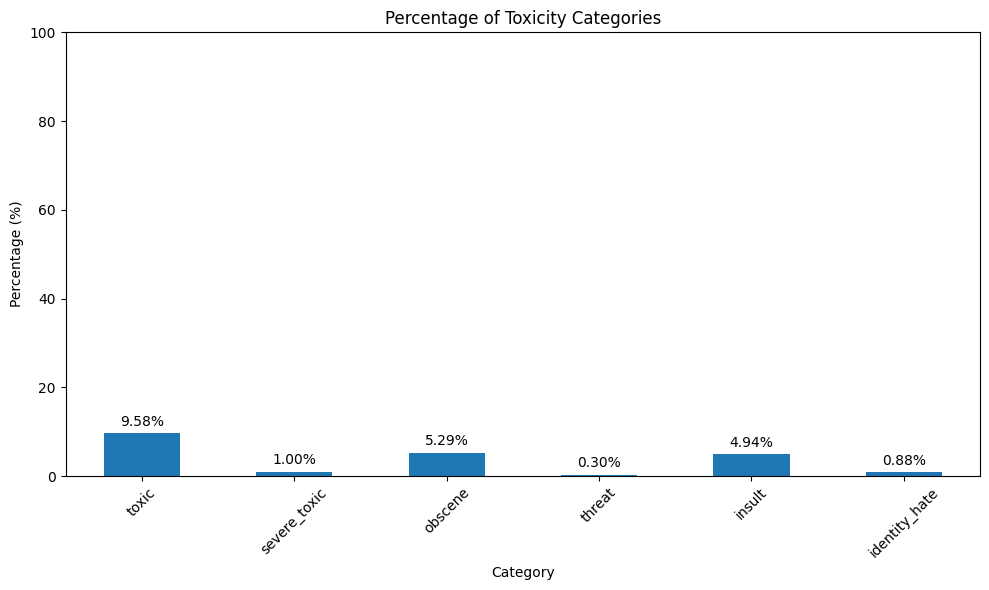

In [10]:
# Calculate the percentages
percentages = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].mean() * 100
# Create a bar chart
plt.figure(figsize=(10, 6))
percentages.plot(kind='bar')
plt.title('Percentage of Toxicity Categories')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)

# Add percentage labels on top of each bar
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

i found manior of data is 1 of all columns and percenatage of manior is round 10% so imbalance is 90% for 0(like : comment is not toxic) and 10% for 1 (like : comment is toxic)

know i will oversampling my data to solve imbalancing by incrasing number of toxic classes and their labels this will affect positivly on my transformer training so will make it can cassify most of 2 classes

In [11]:
# Separate the majority and minority classes
non_toxic = data[data['toxic'] == 0]
toxic = data[data['toxic'] == 1]

# Oversample the minority class (toxic)
toxic_oversampled = resample(toxic, replace=True, n_samples=len(non_toxic), random_state=42)

# Combine the oversampled minority class with the majority class
balanced_data = pd.concat([non_toxic, toxic_oversampled])

balanced_data.shape

(288554, 8)

after oversampling i have balanced data it make data more representitive to toxic and non-toxic classes and know i have 288554 sample because oversampling thats concatinate orginial data with new generated data (modifed) and i will work on this balanced data

**notice** : oversampling solve imbalanced but give to us redundunt comments it may indicate to overfitting and to avoid it i will regulaize my model by using normalization and dropout techniques to make model understand the pattern and do will in test data set

know we will show percentage of toxic classes with respect to all data

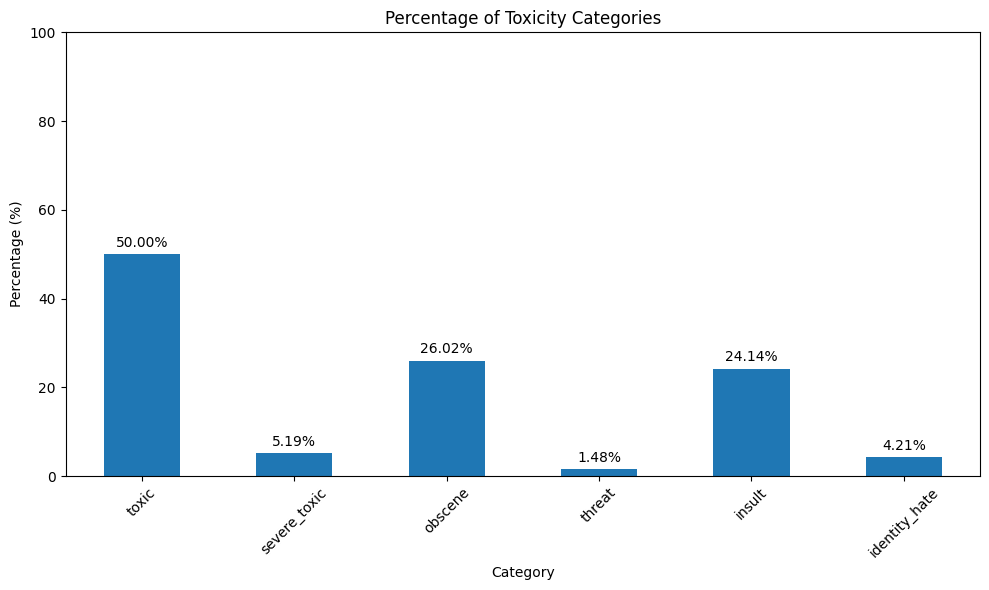

In [12]:
# Calculate the percentages
percentages = balanced_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].mean() * 100
# Create a bar chart
plt.figure(figsize=(10, 6))
percentages.plot(kind='bar')
plt.title('Percentage of Toxicity Categories')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)

# Add percentage labels on top of each bar
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

from this plot we have balancing toxic column that represent 50% toxic and 50% non-toxic it will make model do better in all of casses

# finally do cleaning on all data from nulls , outliers , duplicates and solve imbalancing columns

## **preprocessing on text column** 

In [13]:
# first we will download all necessary recourses to use ntlk
# for stopwords and punctuations and wordnet of english language
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mazen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mazen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mazen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

After done from all data preprocessing must clean our text to make it in standerd form so we will use lot of steps to make it standerd (lowercasing , removing URLS , removing special charcters , removing punctuations , removing stop words and get base of each word by using lemmatization) in text all of removing thing i will remove it is outliers must remove it and after remove all outliers must get base of all words to avoid varites because one word can be represented in a lot of shapes 

In [14]:
def cleaninig(text):
    # 1) Convert all charcters in lowercase to make all words in standerd form
    # we save it in cleaned text
    cleaned_text = text.lower()
    
    # 2) remove urls 
    # Define a regex pattern to match URLs (i study regex patterns from datacamp)(course intro_NLP)
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    # Replace URLs with an empty string 
    # with this way we remove URLs from our comments
    cleaned_text = url_pattern.sub('', cleaned_text)
    
    # 3) remove special charcters
    # Define a regex pattern to match non-alphanumeric characters and spaces
    special_char_pattern = re.compile(r'[^a-zA-Z\s]')
    # Replace special characters with an empty string
    # with this way we remove special characters from our comments
    cleaned_text = special_char_pattern.sub('', cleaned_text)
    
    # 4) remove punctuations
    # Define a regex pattern to match punctuation characters
    # we use library string to get all punctation marks 
    punctuation_pattern = re.compile(f"[{re.escape(string.punctuation)}]")
    # Remove punctuation using the regex pattern
    cleaned_text =  punctuation_pattern.sub('', cleaned_text)
    
    # 5) tokanization
    # split text in words
    # using built-function word_tokenize(text)
    # return splitted words
    tokens = word_tokenize(cleaned_text)
    
    # 6) remove stopwords
    #we save stopwords of english language in varibale called stop_words
    #stopwords.words('') take parameter (language you want to get stopwords of it)
    stop_words = set(stopwords.words('english'))
    # we will save each token without stopwords in each record 
    # and will save it in cleaned_tokens
    cleaned_tokens = [word for word in tokens if word not in stop_words]
    
    # 7) get base of words using (lemmatization)
    #take object from WordNetLemmatizer() to get base of each token(word)
    lemmatizer = WordNetLemmatizer()
    #apply lwmatization on each token on all nouns
    lemmatized_tokens = [lemmatizer.lemmatize(word,pos='n') for word in cleaned_tokens]
    #apply lwmatization on each lemmatized_tokens on all verbs
    lemmatized_tokens = [lemmatizer.lemmatize(word,pos='v') for word in lemmatized_tokens]
    #apply lwmatization on each lemmatized_tokens on all adverbs
    lemmatized_tokens = [lemmatizer.lemmatize(word,pos='r') for word in lemmatized_tokens]
    #apply lwmatization on each lemmatized_tokens on all adjectivs
    lemmatized_tokens = [lemmatizer.lemmatize(word,pos='a') for word in lemmatized_tokens]
    #return cummulative lemmatized_tokens (words)
    lemmatized_sentences = ' '.join(lemmatized_tokens)
    
    return lemmatized_sentences

In [15]:
# apply cleaning function on comment_text
balanced_data['cleaned_comment_text'] = balanced_data["comment_text"].apply(cleaninig)

know we have cleaned_comment_text has text in standerd and cleaned without any outliers so we can train on this data to get better accuracy

In [16]:
# it is comparison between not-cleaned and cleaned text 
balanced_data[["comment_text","cleaned_comment_text"]]

,comment_text,cleaned_comment_text
0,Explanation\nWhy the edits made under my usern...,explanation edit make username hardcore metall...
1,D'aww! He matches this background colour I'm s...,daww match background colour im seemingly stic...
2,"Hey man, I'm really not trying to edit war. It...",hey man im really try edit war guy constantly ...
3,"""\nMore\nI can't make any real suggestions on ...",cant make real suggestion improvement wonder s...
4,"You, sir, are my hero. Any chance you remember...",sir hero chance remember page thats
...,...,...
63880,THAKSIN IS A FXXCKING THIEF AND SHOULD BE SHOT...,thaksin fxxcking thief shoot anf kill family m...
109790,Clone Saga Sucks \nThis article needs more inf...,clone saga suck article need info everyone hat...
6170,Wanker \n\nCharles Knight is a complete arse w...,wanker charles knight complete arse wipe
36641,EPic Fail 333 \n\nI am FREAKING SERIOUS!!!\n\n...,epic fail freak serious block fail goodbye


From reading domain i search on if this data is multi label or not and i found if any detect toxic , obscene or any column in this data it indicate this comment must be deleted so i will sum all of records and save it in coulmn called bad_comment if is equal to 1 it must be deleted or it is bad comment it is useful way to extract penfits from all these columns 

In [17]:
# Add up the toxic-related columns and apply thresholding
toxic_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
balanced_data['bad_comment'] = balanced_data[toxic_columns].sum(axis=1).apply(lambda x: 1 if x >= 1 else 0)

my label will be bad_comment and data has contain 10 columns i will only use 2 columns -> cleaned_comment_text as a feature and bad_comment as a label

We will save all cleaning on data to not run preprocessing each time want to run the code

In [20]:
# saving the dataframe
balanced_data.to_csv('D:\\FCDS\\semster 7\\NLP\\Project\\balanced_data.csv', index=False)

# NOW we finally do all cleaning on all data and text column too 

# **Transformer From Scratch**

To create a transformer for classification from scratch, we need to implement (positional encoding, multi-head attention, feed-forward layers, and encoder layer) but can not use decoder because in classification must transformer get output from encoder and apply on it sigmoid or softmax but will apply sigmoid because we have binary classification problem so decoder layer is not will be used in our problem

# Multi-Head Attention

Multi-head attention into transformer processes data by focusing on different parts, computing attention scores, weighting information, and aggregating it across multiple heads to learn complex patterns and find relationships between it.

In [19]:
# Scaled Dot-Product Attention
# This function will perform scaled dot-product attention between query (q), key (k), and value (v) tensors
# we will use it in multihead attention to get output, attention_weights of words 
# make model to capture pattern between text
def scaled_dot_product_attention(q, k, v, mask):
    #Compute the dot product between query and key
    matmul_qk = tf.matmul(q, k, transpose_b=True)
    # Calculate the square root of the depth of the key
    d_k = tf.cast(tf.shape(k)[-1], tf.float32)
    # to scale the attention logits by dividing by the square root of the depth
    scaled_attention_logits = matmul_qk / tf.math.sqrt(d_k)
    # Apply an optional mask to the attention logits to hide certain positions
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
    # Apply softmax to obtain attention weights and axis = -1 it mean get last dim
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    #calculate weighted sum of the value v using the attention weights
    output = tf.matmul(attention_weights, v)
    return output, attention_weights

# Multi-Head Attention mechanism
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        # getting number of attention heads and model dimension
        self.num_heads = num_heads
        self.d_model = d_model
        # Ensure that d_model is divisible by the number of heads
        assert d_model % self.num_heads == 0
        # this is a depth of each head
        self.depth = d_model // self.num_heads
        # Dense layers (fully connected layers) to project the input for each head
        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)
        # Final dense layer to merge the outputs from all attention heads
        self.dense = tf.keras.layers.Dense(d_model)
     # this function to split the input tensor into multiple heads
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    # now we will project the query, key, and value using the respective dense layers for each head in this function 
    def call(self, q, k, v, mask):
        batch_size = tf.shape(q)[0]

        q = self.split_heads(self.wq(q), batch_size)
        k = self.split_heads(self.wk(k), batch_size)
        v = self.split_heads(self.wv(v), batch_size)
        # we will call scaled dot-product attention for each head to apply it and get
        # weights or patterns captured from text
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        #Transpose and reshape to combine attention outputs from all heads
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))

        output = self.dense(concat_attention)
        return output, attention_weights

it will return attention-weighted values (weighting the values based on attention scores) and attention weights (which parts of the input were most important for generating the context)

# Position-wise Feed-Forward Networks

this function to feed forward through the network by get dimention of layers and return the output after applying relu activation function

In [20]:
# Feed Forward Network
def feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),
        tf.keras.layers.Dense(d_model)
    ])

# Positional Encoding

Positional encoding in a transformer adds unique embeddings to input tokens, allowing the model to consider the order of words in the input sequence, addressing the lack of inherent sequence information in self-attention mechanisms

In [21]:
# Positional encoding
def positional_encoding(position, d_model):
    # Calculate a set of angles to encode positional information
    angle_rads = 1 / np.power(10000, (2 * (np.arange(d_model) // 2)) / np.float32(d_model))
    # Reshape the angles to have a shape of (1, d_model)
    angle_rads = np.reshape(angle_rads, (1, -1))
    # Create an array of positions from 0 to 'position' and reshape it to (position, 1).
    pos = np.arange(position)[:, np.newaxis]
    pos_enc = pos * angle_rads
    # Apply sine to even indices and cosine to odd indices to create positional encodings.
    pos_enc[:, 0::2] = np.sin(pos_enc[:, 0::2])  
    pos_enc[:, 1::2] = np.cos(pos_enc[:, 1::2])  
    # Convert the positional encodings to a TensorFlow tensor with shape (1, position, d_model).
    pos_enc = tf.convert_to_tensor(pos_enc[np.newaxis, ...], dtype=tf.float32)
    return pos_enc

after applying positional encoding we address each word to not waste it and converting input text to encoded text  

# Encoder Layer

Encoder layer for a transformer-based model. It consists of multiple encoder layers, each comprising multi-head self-attention and feed-forward sublayers. The encoder processes input data, adds positional encodings, and applies the specified number of layers to capture **complex patterns and relationships within the data**. It returns the processed output i will use 2 normalization layers and 2 dropout with rate 0.1 (drop 10% of weights) to avoid overfitting

The EncoderLayer function processes input with multi-head self-attention and feed-forward sublayers, applying normalization and dropout, enhancing feature representations

In [22]:
# Encoder Layer
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, dropout_rate):
        super(EncoderLayer, self).__init__()
        # we call Multi-Head Self-Attention Mechanism class and feed froward function
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = feed_forward_network(d_model, dff)
        # Layer Normalization after Self-Attention and Feed-Forward
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        # Dropout Layers for Regularization
        self.dropout1 = tf.keras.layers.Dropout(dropout_rate)
        self.dropout2 = tf.keras.layers.Dropout(dropout_rate)

    # in this we apply and pass variables to get the output
    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2

The Encoder class processes input data through multiple encoder layers in a transformer model. It includes embedding, positional encoding, and stacking of EncoderLayer instances to capture complex patterns and relationships

In [23]:
# Encoder
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, max_position_encoding, dropout_rate=0.1):
        super(Encoder, self).__init__()
        # model hyperparameters
        self.d_model = d_model
        self.num_layers = num_layers
        # Embedding Layer for Input Tokens (convert text to numeric)
        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        # Positional Encoding to Capture Token Positions
        self.pos_encoding = positional_encoding(max_position_encoding, d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, dropout_rate) for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)
        # this take number of layers 
        # to get multiple encoder layers
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)

        return x

i saperate between encoder and encoder layer because i take object from encoder layer to make it as a unit that i can give parameter number of layers and will repeated many times to create number of layers i want to transformer contain 

# Final Transformer

Finaly i combine them into class Transformer to create from it object to create my transformer with my hyperparameter values i will pass it through the objected created from class transformer

In [24]:
# Define the binary classification model
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, max_position_encoding):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, max_position_encoding)
        # Applying sigmoid activation for binary classification
        self.final_layer = tf.keras.layers.Dense(1, activation='sigmoid')  

    def call(self, inp, training, mask):
        enc_output = self.encoder(inp, training, mask)
        # Average pooling over sequence length
        # to adapt length of the output
        final_output = self.final_layer(tf.reduce_mean(enc_output, axis=1))  
        return final_output

# **Data preparing to use it in Transformer**

# select featuers and labels and split data to train and test and validation

we will select the data after that split it to traini 40% training , 30% testing and 30% validtain i split to 40% because my new data is oversampled so it has 288554 sampple so wi will train on 115421 sample so i think is enough for training our the model

In [43]:
# Now we will select features and labels 
# feature is text from cleaned_comment_text colum
comments = balanced_data["cleaned_comment_text"].values
#labels is bad_comment column
labels = balanced_data["bad_comment"].values

# Split the data into training (40%) and combined validation/test (60%)
train_texts, val_test_texts, train_labels, val_test_labels = train_test_split(comments, labels, test_size=0.6, random_state=42)

# Split the combined validation/test set into separate validation (50%) and test (50%)
val_texts, test_texts, val_labels, test_labels = train_test_split(val_test_texts, val_test_labels, test_size=0.5, random_state=42)

after splitting i will tokanize , padding , encode and convering to tensor to make my input is valid to work into transformer

# Tokenize , padding , encoding and converting to tensor type 

first we will tokanise the sentence into words and get the voacbulary size and convert this vocabluaries to integer sequences (encoding)  

In [26]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(comments)

# Getting Vocabulary size
vocab_size = len(tokenizer.word_index) + 1  

# Padding and Truncation
# i adjust this number 
# because max_seq_length of data is grater than 4900 
# so i use this number
max_seq_length = 128  

# Tokenize and preprocess the text data for training, validation, and test
# and make train_sequences and val test sequences in numeric type
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

we have 3 sets in integer sequences now we will pad and converting padded sequences will convert it to tensor type to make run into tensorflow framwork

In [27]:
# padding that fill with less length secntece with zero
# pad text to make all of sentences are the same length 
train_input_ids = pad_sequences(train_sequences, maxlen=max_seq_length, padding='post', truncating='post')
val_input_ids = pad_sequences(val_sequences, maxlen=max_seq_length, padding='post', truncating='post')
test_input_ids = pad_sequences(test_sequences, maxlen=max_seq_length, padding='post', truncating='post')

# Convert to TensorFlow Tensors training , validating and testing sets after padded and encoded and tokanised
train_input_ids = tf.constant(train_input_ids)
val_input_ids = tf.constant(val_input_ids)
test_input_ids = tf.constant(test_input_ids)

now our data is in standerd form to train on it so we will prepare our model and data to train on it

# preparing model and data to train on it

we will define hyperparameters that will send to our transformer to train it 

In [31]:
# Define the hyperparameters
vocab_size = vocab_size # vocabluary length 
d_model = 256 #the dimensionality of the model's hidden states,A larger d_model can capture more complex patterns but may require more computational resources
num_heads = 4 # number of heads of transformer if we Increasing the number of heads can improve the model's ability to capture different types of relationships in the data
num_layers = 2 # number of transformer layers 
dff = 265 # dff specifies the dimension of the hidden layer,This layer follows the multi-head self-attention layer. A larger dff can make the model more expressive but might require more resources
batch_size = 32 # splitting data into 32 sample in each batch
num_epochs = 5  # Replace with the number of epochs you want to run

now we creat datasets contain inputs and their outputs to extract it when training and testing the model with batch size 32 sample for each batch

In [32]:
# Create TensorFlow Datasets for training, validation, and testing
# thats combine each text with their labels 
# and split it into batches 
train_dataset = tf.data.Dataset.from_tensor_slices((train_input_ids, train_labels)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((val_input_ids, val_labels)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_input_ids, test_labels)).batch(batch_size)

now we take from tensorflow objects from class transformer , losses and optimazers to initalize our transformer and loss function to calculate the gradient and optemizer to update weights in backprobagation we will use binary cross entorpy because we have binary classification and optimazer adam because it adapts learning rate to get the best learnable updated

In [33]:
# Initialize the binary classifier model
# Define the binary cross-entropy loss and optimaizer
Transformer_classifier = Transformer(num_layers, d_model, num_heads, dff, vocab_size, max_seq_length)
loss_object = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

this function i use it to create the mask of each set in training and testing to shape thats takes input sequences, typically representing text, and creates a binary mask. It sets 1 for valid positions and 0 for padding positions, expanding dimensions for model compatibility.

In [34]:
# Define a function to create masks based on input sequences
def mask_creator(inputs):
    # Create a mask of shape (batch_size, seq_length)
    mask = tf.math.logical_not(tf.math.equal(inputs, 0))
    mask = tf.cast(mask, dtype=tf.float32)
    # Expand dimensions to match the model's expectations
    mask = mask[:, tf.newaxis, tf.newaxis, :]  
    return mask  

it just a train step to perform a training step for our Transformer it computes predictions, calculates the loss, computes gradients, and updates model weights using an optimizer. It returns the loss. 

In [35]:
# Training step
@tf.function
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        # get output from transformer after train in sample batched
        predictions = Transformer_classifier(inputs, True, mask_creator(inputs))
        # calculate the loss 
        loss = loss_object(targets, predictions)
    #compute the gradient for each batch
    gradients = tape.gradient(loss, Transformer_classifier.trainable_variables)
    # apply the optimazer
    optimizer.apply_gradients(zip(gradients, Transformer_classifier.trainable_variables))
    # and return the loss
    return loss

# Train and Evaluate Our Transformer

In This training loop we will iterates through multiple epochs, evaluating a Transformer on training and validation datasets. It computes loss, updates accuracy metrics, and prints training and validation progress

In [37]:
# Training loop
for epoch in range(num_epochs):
    # Training step
    # this parameters to calculate training loss 
    # number of trained batches
    total_training_loss = 0.0
    num_training_batches = 0
    # define the accuracy matric will use binary accuracy because our problem is binary classification
    training_accuracy_metric = tf.keras.metrics.BinaryAccuracy()

    # train on training dataset
    for batch in train_dataset:
        # extract inputs and labels from each batch  
        inputs, targets = batch
        # calculate loss  
        loss = train_step(inputs, targets)
        # total loss to get total loss in training
        # and to get accuracy of training 
        total_training_loss += loss
        num_training_batches += 1
        predictions = Transformer_classifier(inputs, False, mask_creator(inputs))
        training_accuracy_metric.update_state(targets, predictions)

    training_loss = total_training_loss / num_training_batches
    training_accuracy = training_accuracy_metric.result().numpy()

    # Validation step
    total_validation_loss = 0.0
    num_validation_batches = 0
    validation_accuracy_metric = tf.keras.metrics.BinaryAccuracy()

    # validate model using validation dataset
    # we will repeat we did in training to validation
    for batch in val_dataset:  
        inputs, targets = batch  
        mask = mask_creator(inputs)
        predictions = Transformer_classifier(inputs, False, mask)
        loss = loss_object(targets, predictions)
        total_validation_loss += loss
        num_validation_batches += 1
        validation_accuracy_metric.update_state(targets, predictions)

    validation_loss = total_validation_loss / num_validation_batches
    validation_accuracy = validation_accuracy_metric.result().numpy()
    # finally we will print training loss and accuracy and also in validation for each epoch
    print(f"Epoch {epoch + 1}:")
    print(f"Training Loss: {training_loss:.4f}, Training Accuracy: {training_accuracy:.4f}")
    print(f"Validation Loss: {validation_loss:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

Epoch 1:
Training Loss: 0.4437, Training Accuracy: 0.8184
Validation Loss: 0.3730, Validation Accuracy: 0.8459
Epoch 2:
Training Loss: 0.3424, Training Accuracy: 0.8616
Validation Loss: 0.3684, Validation Accuracy: 0.8497
Epoch 3:
Training Loss: 0.2914, Training Accuracy: 0.8889
Validation Loss: 0.2877, Validation Accuracy: 0.8834
Epoch 4:
Training Loss: 0.2808, Training Accuracy: 0.8903
Validation Loss: 0.3191, Validation Accuracy: 0.8764
Epoch 5:
Training Loss: 0.2632, Training Accuracy: 0.9002
Validation Loss: 0.2834, Validation Accuracy: 0.8876


from the output we have high accuracy in validation and training it make model is good and paramter of the model is good because resorces and light i run only 5 epochs i think if i run much than epochs will give me higher accuracy but to sure model is well we must test this model to see if is overfitted or not so in the next step we will test the model

we saved the weight to test on it or start new training but not from beginning but from last training and saved weights

In [38]:
# Save weights at the end of the epoch
Transformer_classifier.save_weights("Transformer_from_scratch.ckpt")

we will initialize metrics and performs testing on a Transformer using a test dataset. It calculates test loss and accuracy, as well as precision, recall, and F1 score for binary classification, and prints the test results, this helping us to evaluate the model's performance

In [40]:
# Initialize metrics
test_accuracy_metric = tf.keras.metrics.BinaryAccuracy()
total_test_loss = 0.0
num_test_batches = 0
all_true_labels = []
all_predictions = []

# Testing loop
for batch in test_dataset:
    inputs, targets = batch
    mask = mask_creator(inputs)
    # Set training to False for make transformer not train but just classify and predict the output
    predictions = Transformer_classifier(inputs, training=False, mask=mask)  
    loss = loss_object(targets, predictions)
    total_test_loss += loss
    num_test_batches += 1
    test_accuracy_metric.update_state(targets, predictions)
    
    # Append true labels and predictions for F1 score calculation
    all_true_labels.append(targets)
    all_predictions.append(predictions)

# Calculate test metrics
test_loss = total_test_loss / num_test_batches
test_accuracy = test_accuracy_metric.result().numpy()

# Flatten the lists of true labels and predictions
all_true_labels = tf.concat(all_true_labels, axis=0)
all_predictions = tf.concat(all_predictions, axis=0)

# Convert predictions to binary values (0 or 1)
binary_predictions = tf.cast(tf.round(all_predictions), dtype=tf.int32)


In [42]:
# Ensure true labels and predictions are on the CPU
all_true_labels = all_true_labels.numpy()  # Convert TensorFlow tensor to NumPy array
binary_predictions = binary_predictions.numpy()

# Calculate precision, recall, and F1 score
precision = precision_score(all_true_labels, binary_predictions, average='weighted')
recall = recall_score(all_true_labels, binary_predictions, average='weighted')
f1 = f1_score(all_true_labels, binary_predictions, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.8878
Recall: 0.8872
F1 Score: 0.8872


after test our model we found test loss is 0.2862 and a test accuracy of 88.78%. The precision is 88.72%, recall is 88.72%, and the F1 score is 88.48%, indicating good model performance for binary classification in our model and i use Precision and Recall to evaluate what is model do in toxic comment and non-toxic comment so i find that because **Precision** is high so model classify comment is non-toxic correctly and good in it and find **recall** is also high so my model classify well if we have toxic comment so this model is doing well in both of classes 

# *Pre trained model BERT*

In [2]:
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Reading data and split it into training , validaion and testing sets

In [3]:
final_data = pd.read_csv(r"D:\FCDS\semster 7\NLP\Project\balanced_data.csv")

# Now we will select features and labels 
# feature is text from cleaned_comment_text colum
comments = final_data["cleaned_comment_text"].values
#labels is bad_comment column
labels = final_data["bad_comment"].values

In [48]:
final_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned_comment_text,bad_comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edit make username hardcore metall...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww match background colour im seemingly stic...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im really try edit war guy constantly ...,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,cant make real suggestion improvement wonder s...,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page thats,0
...,...,...,...,...,...,...,...,...,...,...
288549,aaefa83a633d173a,THAKSIN IS A FXXCKING THIEF AND SHOULD BE SHOT...,1,0,1,1,1,0,thaksin fxxcking thief shoot anf kill family m...,1
288550,4b3c47434bbdc3dd,Clone Saga Sucks \nThis article needs more inf...,1,0,1,0,1,0,clone saga suck article need info everyone hat...,1
288551,107726c474021958,Wanker \n\nCharles Knight is a complete arse w...,1,0,1,0,1,0,wanker charles knight complete arse wipe,1
288552,61e0a927a0f94722,EPic Fail 333 \n\nI am FREAKING SERIOUS!!!\n\n...,1,0,0,0,0,0,epic fail freak serious block fail goodbye,1


In [4]:
# Split the data into training (40%) and combined validation/test (60%)
train_texts, val_test_texts, train_labels, val_test_labels = train_test_split(comments, labels, test_size=0.6, random_state=42)

# Split the combined validation/test set into separate validation (50%) and test (50%)
val_texts, test_texts, val_labels, test_labels = train_test_split(val_test_texts, val_test_labels, test_size=0.5, random_state=42)

# Convert numpy arrays to Python lists
train_texts = train_texts.tolist()
val_texts = val_texts.tolist()
test_texts = test_texts.tolist()

# Ensure the elements are strings
train_texts = list(map(str, train_texts))
val_texts = list(map(str, val_texts))
test_texts = list(map(str,test_texts))

# Prepare data to BERT (Tokanize , Same length and , Tensor datatype) 

In [5]:
# Tokenization and dataset preparation
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=128)

# Convert to PyTorch tensors
train_encodings = {key: torch.tensor(val) for key, val in train_encodings.items()}
val_encodings = {key: torch.tensor(val) for key, val in val_encodings.items()}
test_encodings = {key: torch.tensor(val) for key, val in test_encodings.items()}

# Convert labels to tensors
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)
test_labels = torch.tensor(test_labels)

# Create PyTorch Datasets
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

train_dataset = CustomDataset(train_encodings, train_labels)
val_dataset = CustomDataset(val_encodings, val_labels)
test_dataset = CustomDataset(test_encodings, test_labels)

Calling BERT for classification and freeze all layers except classification head to transfer learning on it with binary classification and i print all of trainable and frozen parameters to know what will train and what will not

In [ ]:
# Load the pretrained BERT model
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Freeze all layers except the classification head
for name, param in model.named_parameters():
    if "classifier" not in name:
        param.requires_grad = False

# Verify which parameters are trainable
for name, param in model.named_parameters():
    print(f"{name}: {'Trainable' if param.requires_grad else 'Frozen'}")

# Define the optimizer (only trainable parameters will be optimized)
optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=5e-5)

# Move model to GPU if available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


bert.embeddings.word_embeddings.weight: Frozen
bert.embeddings.position_embeddings.weight: Frozen
bert.embeddings.token_type_embeddings.weight: Frozen
bert.embeddings.LayerNorm.weight: Frozen
bert.embeddings.LayerNorm.bias: Frozen
bert.encoder.layer.0.attention.self.query.weight: Frozen
bert.encoder.layer.0.attention.self.query.bias: Frozen
bert.encoder.layer.0.attention.self.key.weight: Frozen
bert.encoder.layer.0.attention.self.key.bias: Frozen
bert.encoder.layer.0.attention.self.value.weight: Frozen
bert.encoder.layer.0.attention.self.value.bias: Frozen
bert.encoder.layer.0.attention.output.dense.weight: Frozen
bert.encoder.layer.0.attention.output.dense.bias: Frozen
bert.encoder.layer.0.attention.output.LayerNorm.weight: Frozen
bert.encoder.layer.0.attention.output.LayerNorm.bias: Frozen
bert.encoder.layer.0.intermediate.dense.weight: Frozen
bert.encoder.layer.0.intermediate.dense.bias: Frozen
bert.encoder.layer.0.output.dense.weight: Frozen
bert.encoder.layer.0.output.dense.bias: 

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

# Training BERT model

In [63]:
# Training loop
epochs = 3
batch_size = 16
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

In [56]:
# Metrics and visualization variables
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Directory to save model weights
save_dir = r"D:\FCDS\semster 7\NLP\Project\pre_trained_transfer_learning_classification_BERT"
os.makedirs(save_dir, exist_ok=True)

# Training loop with time estimation
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    total_loss = 0
    correct_train, total_train = 0, 0
    start_time = time.time()  # Track start time of the epoch

    # Estimate time based on the previous epoch (if applicable)
    if epoch > 0:
        avg_batch_time = total_epoch_time / len(train_loader)  # Average time per batch in the previous epoch
        estimated_epoch_time = avg_batch_time * len(train_loader)
        estimated_minutes = estimated_epoch_time / 60
        estimated_seconds = estimated_epoch_time % 60
        print(f"Epoch {epoch + 1}/{epochs} will take approximately {int(estimated_minutes)}m {int(estimated_seconds)}s")

    total_epoch_time = 0  # Reset the total time for the epoch

    # Training loop
    for batch_idx, batch in enumerate(train_loader, start=1):
        batch_start_time = time.time()  # Track start time of the batch

        # Move batch to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Compute training accuracy
        preds = torch.argmax(logits, dim=1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

        # Track batch time and update total epoch time
        batch_time = time.time() - batch_start_time
        total_epoch_time += batch_time

    # Calculate training accuracy and loss
    train_accuracy = correct_train / total_train
    train_accuracies.append(train_accuracy)
    train_losses.append(total_loss / len(train_loader))

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    val_loss, correct_val, total_val = 0, 0, 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            val_loss += outputs.loss.item()

            preds = torch.argmax(outputs.logits, dim=1)
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)

    val_accuracy = correct_val / total_val
    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss / len(val_loader))

    # Calculate and print epoch time and metrics
    epoch_time = time.time() - start_time
    print(f"Epoch {epoch + 1}/{epochs}, Time: {epoch_time:.2f}s, "
          f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")

    # Save model weights for the epoch
    weight_path = os.path.join(save_dir, f"epoch_{epoch + 1}_weights.pth")
    torch.save(model.state_dict(), weight_path)
    print(f"Weights saved to {weight_path}")

Epoch 1/3, Time: 712.99s, Train Loss: 0.5282, Train Accuracy: 0.7688, Val Loss: 0.4472, Val Accuracy: 0.8172
Weights saved to D:\FCDS\semster 7\NLP\Project\pre_trained_transfer_learning_classification_BERT\epoch_1_weights.pth
Epoch 2/3 will take approximately 6m 47s
Epoch 2/3, Time: 710.58s, Train Loss: 0.4536, Train Accuracy: 0.7981, Val Loss: 0.4068, Val Accuracy: 0.8248
Weights saved to D:\FCDS\semster 7\NLP\Project\pre_trained_transfer_learning_classification_BERT\epoch_2_weights.pth
Epoch 3/3 will take approximately 6m 46s
Epoch 3/3, Time: 712.87s, Train Loss: 0.4310, Train Accuracy: 0.8040, Val Loss: 0.3905, Val Accuracy: 0.8282
Weights saved to D:\FCDS\semster 7\NLP\Project\pre_trained_transfer_learning_classification_BERT\epoch_3_weights.pth


In [64]:
# Load the saved model weights
checkpoint_path = r"D:\FCDS\semster 7\NLP\Project\pre_trained_transfer_learning_classification_BERT\epoch_3_weights.pth"
if os.path.exists(checkpoint_path):
    model.load_state_dict(torch.load(checkpoint_path))
    print(f"Resumed training from checkpoint: {checkpoint_path}")
else:
    print("Checkpoint not found, starting training from scratch.")

# Continue training from the next epoch
start_epoch = 3  # Starting from epoch 4 (as epoch 3 is already loaded)

# Metrics and visualization variables
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Directory to save model weights
save_dir = r"D:\FCDS\semster 7\NLP\Project\pre_trained_transfer_learning_classification_BERT"
os.makedirs(save_dir, exist_ok=True)

# Number of epochs (adjust according to your needs)
epochs = 10  # If continuing from epoch 3, the total number of epochs will be from 4 to 10.

# Training loop with time estimation
for epoch in range(start_epoch, epochs):
    model.train()  # Set the model to training mode
    total_loss = 0
    correct_train, total_train = 0, 0
    start_time = time.time()  # Track start time of the epoch

    # Estimate time based on the previous epoch (if applicable)
    if epoch > 0:
        avg_batch_time = total_epoch_time / len(train_loader)  # Average time per batch in the previous epoch
        estimated_epoch_time = avg_batch_time * len(train_loader)
        estimated_minutes = estimated_epoch_time / 60
        estimated_seconds = estimated_epoch_time % 60
        print(f"Epoch {epoch + 1}/{epochs} will take approximately {int(estimated_minutes)}m {int(estimated_seconds)}s")

    total_epoch_time = 0  # Reset the total time for the epoch

    # Training loop
    for batch_idx, batch in enumerate(train_loader, start=1):
        batch_start_time = time.time()  # Track start time of the batch

        # Move batch to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Compute training accuracy
        preds = torch.argmax(logits, dim=1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

        # Track batch time and update total epoch time
        batch_time = time.time() - batch_start_time
        total_epoch_time += batch_time

    # Calculate training accuracy and loss
    train_accuracy = correct_train / total_train
    train_accuracies.append(train_accuracy)
    train_losses.append(total_loss / len(train_loader))

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    val_loss, correct_val, total_val = 0, 0, 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            val_loss += outputs.loss.item()

            preds = torch.argmax(outputs.logits, dim=1)
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)

    val_accuracy = correct_val / total_val
    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss / len(val_loader))

    # Calculate and print epoch time and metrics
    epoch_time = time.time() - start_time
    print(f"Epoch {epoch + 1}/{epochs}, Time: {epoch_time:.2f}s, "
          f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")

    # Save model weights for the epoch
    weight_path = os.path.join(save_dir, f"epoch_{epoch + 1}_weights.pth")
    torch.save(model.state_dict(), weight_path)
    print(f"Weights saved to {weight_path}")

C:\Users\mazen\AppData\Local\Temp\ipykernel_5044\3843301954.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path))


Resumed training from checkpoint: D:\FCDS\semster 7\NLP\Project\pre_trained_transfer_learning_classification_BERT\epoch_3_weights.pth
Epoch 4/10 will take approximately 6m 46s
Epoch 4/10, Time: 712.23s, Train Loss: 0.4201, Train Accuracy: 0.8087, Val Loss: 0.3820, Val Accuracy: 0.8295
Weights saved to D:\FCDS\semster 7\NLP\Project\pre_trained_transfer_learning_classification_BERT\epoch_4_weights.pth
Epoch 5/10 will take approximately 6m 46s
Epoch 5/10, Time: 740.64s, Train Loss: 0.4142, Train Accuracy: 0.8103, Val Loss: 0.3734, Val Accuracy: 0.8355
Weights saved to D:\FCDS\semster 7\NLP\Project\pre_trained_transfer_learning_classification_BERT\epoch_5_weights.pth
Epoch 6/10 will take approximately 7m 15s
Epoch 6/10, Time: 710.43s, Train Loss: 0.4098, Train Accuracy: 0.8123, Val Loss: 0.3687, Val Accuracy: 0.8358
Weights saved to D:\FCDS\semster 7\NLP\Project\pre_trained_transfer_learning_classification_BERT\epoch_6_weights.pth
Epoch 7/10 will take approximately 6m 45s
Epoch 7/10, Time:

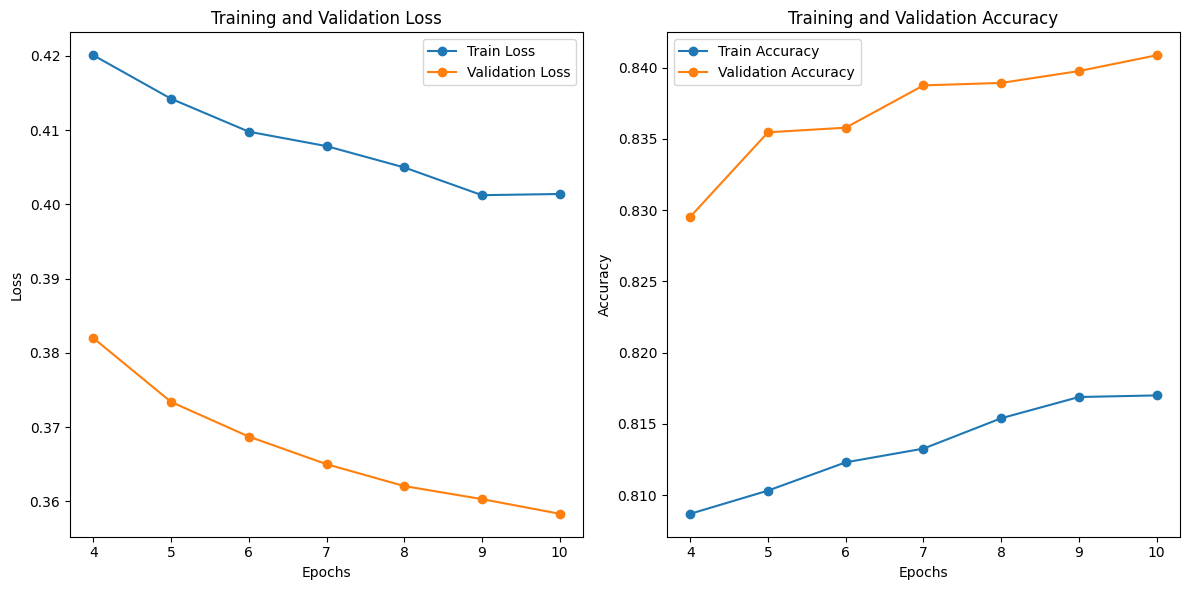

In [67]:
# Adjust x to match the length of train_losses and val_losses
x = range(start_epoch + 1, start_epoch + len(train_losses) + 1)

# Plot training and validation losses
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, train_losses, label='Train Loss', marker='o')
plt.plot(x, val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(x, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(x, val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [59]:
# Evaluate on test set
model.eval()
test_preds, test_labels_list = [], []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        test_preds.extend(preds.cpu().numpy())
        test_labels_list.extend(labels.cpu().numpy())

In [ ]:
# Compute evaluation metrics
accuracy = accuracy_score(test_labels_list, test_preds)
precision = precision_score(test_labels_list, test_preds, average='binary')
recall = recall_score(test_labels_list, test_preds, average='binary')
f1 = f1_score(test_labels_list, test_preds, average='binary')
conf_matrix = confusion_matrix(test_labels_list, test_preds)

# Print metrics
print("Test Set Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Test Set Metrics:
Accuracy: 0.8295
Precision: 0.8494
Recall: 0.8052
F1-Score: 0.8267


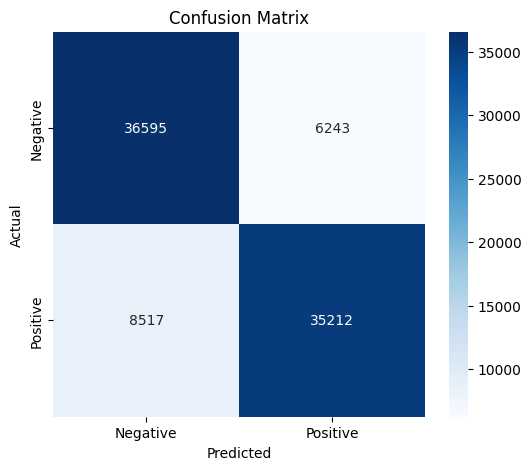

In [61]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# *Bonus models*

In [61]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Embedding, Dense, GRU, LSTM, Dropout, Bidirectional, Attention, Flatten, GlobalAveragePooling1D
)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


In [62]:
final_data = pd.read_csv(r"D:\FCDS\semster 7\NLP\Project\balanced_data.csv")

# Now we will select features and labels 
# feature is text from cleaned_comment_text colum
comments = final_data["cleaned_comment_text"].values
#labels is bad_comment column
labels = final_data["bad_comment"].values

# Split the data into training (60%), validation (20%), and test (20%)
train_texts, val_test_texts, train_labels, val_test_labels = train_test_split(
    comments, labels, test_size=0.4, random_state=42
)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    val_test_texts, val_test_labels, test_size=0.5, random_state=42
)

# Ensure the elements are strings
train_texts = list(map(str, train_texts))
val_texts = list(map(str, val_texts))
test_texts = list(map(str, test_texts))

In [63]:
# Tokenize and pad the sequences
max_words = len(tokenizer.word_index) + 1
max_len = 128

# Tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)

# Sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Padding
x_train = pad_sequences(train_sequences, maxlen=max_len, padding="post")
x_val = pad_sequences(val_sequences, maxlen=max_len, padding="post")
x_test = pad_sequences(test_sequences, maxlen=max_len, padding="post")

y_train = np.array(train_labels)
y_val = np.array(val_labels)
y_test = np.array(test_labels)

In [66]:
# Build Attention Layer
class AttentionLayer(Model):
    def call(self, inputs):
        query, value = inputs
        scores = tf.matmul(query, value, transpose_b=True)
        scores = tf.nn.softmax(scores, axis=-1)
        output = tf.matmul(scores, value)
        return output

# Define model creation function
def build_model(rnn_type="GRU"):
    input_layer = Input(shape=(max_len,))
    embedding_layer = Embedding(max_words, 128, input_length=max_len)(input_layer)

    if rnn_type == "GRU":
        rnn_layer = Bidirectional(GRU(64, return_sequences=True))(embedding_layer)
    elif rnn_type == "LSTM":
        rnn_layer = Bidirectional(LSTM(64, return_sequences=True))(embedding_layer)

    attention_output = AttentionLayer()([rnn_layer, rnn_layer])
    pooling_layer = GlobalAveragePooling1D()(attention_output)
    dropout_layer = Dropout(0.3)(pooling_layer)
    output_layer = Dense(1, activation="sigmoid")(dropout_layer)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Train and evaluate the model
def train_and_evaluate_model(model, rnn_type):
    print(f"Training {rnn_type} model...")
    history = model.fit(
        x_train,
        y_train,
        validation_data=(x_val, y_val),
        epochs=5,
        batch_size=64,
        verbose=1,
        callbacks=[]
    )

    # Evaluate the model on test data
    print("\nEvaluating model...")
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Plot training history
    plot_training_history(history, rnn_type)

    return model

# Plot training and validation metrics
def plot_training_history(history, rnn_type):
    epochs = range(1, len(history.history["loss"]) + 1)

    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history["loss"], label="Training Loss")
    plt.plot(epochs, history.history["val_loss"], label="Validation Loss")
    plt.title(f"{rnn_type} Model Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history["accuracy"], label="Training Accuracy")
    plt.plot(epochs, history.history["val_accuracy"], label="Validation Accuracy")
    plt.title(f"{rnn_type} Model Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


Training GRU model...
Epoch 1/5
2706/2706 [==============================] - 98s 35ms/step - loss: 0.1794 - accuracy: 0.9290 - val_loss: 0.0981 - val_accuracy: 0.9652
Epoch 2/5
2706/2706 [==============================] - 95s 35ms/step - loss: 0.0639 - accuracy: 0.9793 - val_loss: 0.0736 - val_accuracy: 0.9754
Epoch 3/5
2706/2706 [==============================] - 95s 35ms/step - loss: 0.0324 - accuracy: 0.9902 - val_loss: 0.0682 - val_accuracy: 0.9805
Epoch 4/5
2706/2706 [==============================] - 105s 39ms/step - loss: 0.0193 - accuracy: 0.9942 - val_loss: 0.0662 - val_accuracy: 0.9829
Epoch 5/5
2706/2706 [==============================] - 101s 37ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.0720 - val_accuracy: 0.9830

Evaluating model...
Test Loss: 0.0694, Test Accuracy: 0.9836


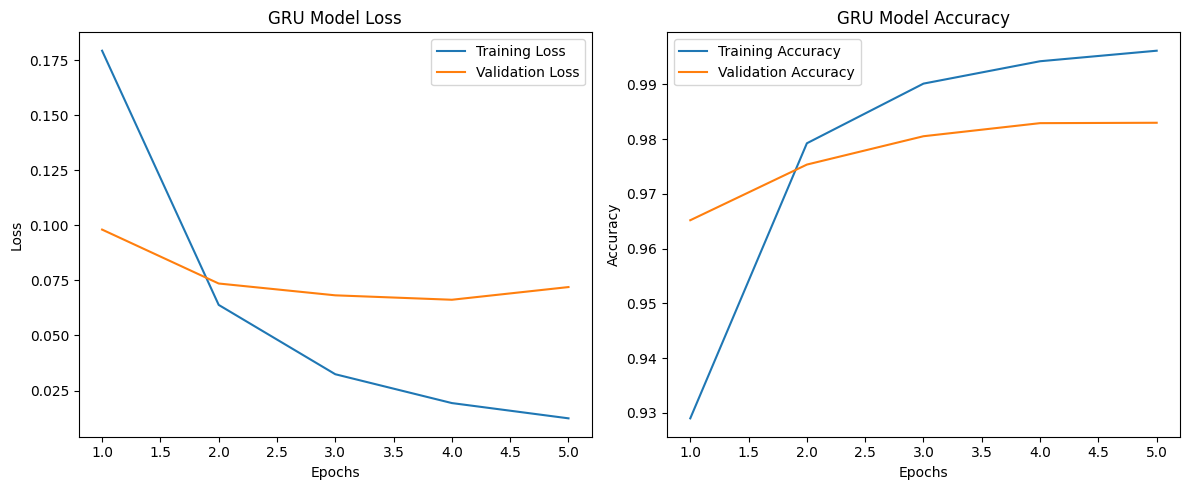

Time taken for GRU: 509.99 seconds



In [67]:
# Train GRU and LSTM models
start_time = time.time()
gru_model = build_model(rnn_type="GRU")
train_and_evaluate_model(gru_model, rnn_type="GRU")
end_time = time.time()
print(f"Time taken for GRU: {end_time - start_time:.2f} seconds\n")

Training LSTM model...
Epoch 1/5
2706/2706 [==============================] - 97s 35ms/step - loss: 0.2537 - accuracy: 0.8930 - val_loss: 0.1283 - val_accuracy: 0.9545
Epoch 2/5
2706/2706 [==============================] - 93s 35ms/step - loss: 0.0948 - accuracy: 0.9663 - val_loss: 0.0860 - val_accuracy: 0.9714
Epoch 3/5
2706/2706 [==============================] - 93s 35ms/step - loss: 0.0538 - accuracy: 0.9825 - val_loss: 0.0699 - val_accuracy: 0.9788
Epoch 4/5
2706/2706 [==============================] - 94s 35ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0985 - val_accuracy: 0.9747
Epoch 5/5
2706/2706 [==============================] - 93s 35ms/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0733 - val_accuracy: 0.9818

Evaluating model...
Test Loss: 0.0740, Test Accuracy: 0.9814


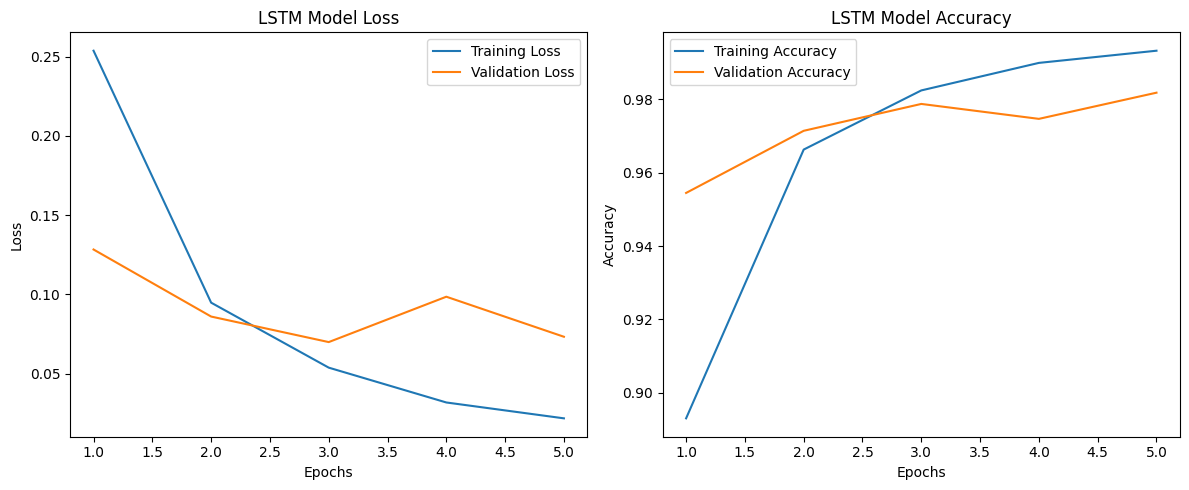

Time taken for LSTM: 486.81 seconds



In [68]:
start_time = time.time()
lstm_model = build_model(rnn_type="LSTM")
train_and_evaluate_model(lstm_model, rnn_type="LSTM")
end_time = time.time()
print(f"Time taken for LSTM: {end_time - start_time:.2f} seconds\n")